In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 34.2 MB/s 


In [2]:
!mkdir images

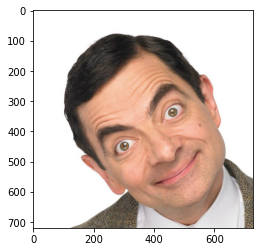

In [6]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import cv2
import random 
img = plt.imread("ms.jpg" )
plt.imshow(img)
plt.show()

In [8]:
face_detector = MTCNN()

In [9]:
def draw_facebox_and_keypoints(filename, result_list):
    
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            
    plt.show()

In [10]:
results = face_detector.detect_faces(img)

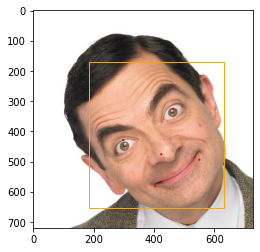

In [11]:
draw_facebox_and_keypoints('ms.jpg', results)

In [12]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [13]:
def alignment_procedure(img, left_eye, right_eye):

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    if b != 0 and c != 0:

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    return img

In [14]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

In [ ]:
plt.imshow(img)

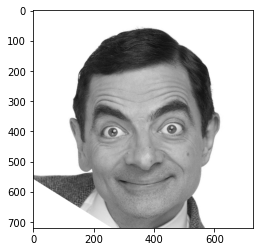

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 0:
            img[i, j] = 255
            
plt.imshow(img, cmap="gray")